# Аналитика рынка заведений общественного питания Москвы

### План:
1. Загрузим и изучим данные разными методами, чтобы проверить пропуски, типы данных и познакомиться с самими данными, которые доступны для исследования.


2. Проанализируем данные:
    - Исследуем соотношение видов объектов общественного питания по количеству.
    - Исследуем соотношение сетевых и несетевых заведений по количеству.
    - Определим, для какого вида объекта общественного питания характерно сетевое распространение.
    - Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
    - Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим, какой вид предоставляет в среднем самое большое количество посадочных мест.
    - Выделим отдельно информацию об улице из данных адресов.
    - Построим график топ-10 улиц по количеству объектов общественного питания и определим, в каких районах Москвы находятся эти улицы.
    - Найдём число улиц с одним объектом общественного питания и определим, в каких районах Москвы находятся эти улицы.
    - Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности.

    Будем использовать методы визуализации данных из библиотек matplotlib и seaborn.
    
    
3. Сформируем выводы и рекомендации о виде заведения, которое планируется открыть, количестве посадочных мест, а также районе расположения. Прокомментируем возможность развития сети.

<a name="researchdata"></a>

## Шаг 1. Откроем файлы с данными и изучим общую информацию

Импортируем библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загружаем файл с данными о заведениях общественного питания в Москве:

In [2]:
rest_data = pd.read_csv('/datasets/rest_data.csv') 

**Посмотрим на общую информацию по датасету**

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**Проверим дубликаты**

In [4]:
rest_data.duplicated().sum()

0

Дубликатов и пропусков нет.

**Посмотрим на описательные статистики датасета**

In [7]:
rest_data.describe()

,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


**Посмотрим на сам датасет**

In [8]:
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


### Вывод

1. Пропусков и дубликатов в таблицах нет.

2. Типы данных соответствуют указанным данным.

3. Стоит переименовать столбец number для соответствия данным названию столбца.

**Переименуем столбец number**

In [9]:
rest_data = rest_data.rename(columns={'number': 'seats_count'})

rest_data.head()

,id,object_name,chain,object_type,address,seats_count
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<a name="analysis"></a>

## Шаг 2. Анализ данных

1. Исследуем соотношение видов объектов общественного питания по количеству.
1. Исследуем соотношение сетевых и несетевых заведений по количеству.
1. Определим, для какого вида объекта общественного питания характерно сетевое распространение.
1. Узнаем, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.
1. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим, какой вид предоставляет в среднем самое большое количество посадочных мест.
1. Выделим отдельно информацию об улице из данных адресов.
1. Построим график топ-10 улиц по количеству объектов общественного питания и определим, в каких районах Москвы находятся эти улицы.
1. Найдём число улиц с одним объектом общественного питания и определим, в каких районах Москвы находятся эти улицы.
1. Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности.

<a name="objecttyperatio"></a>

**1. Исследуем соотношение видов объектов общественного питания по количеству**

Посчитаем количество каждого вида объекта общественного питания:

In [10]:
object_type_count = rest_data['object_type'].value_counts().reset_index()
object_type_count.columns = ['object_type', 'object_count']

object_type_count

,object_type,object_count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


Визуализируем полученный результат в виде графика:

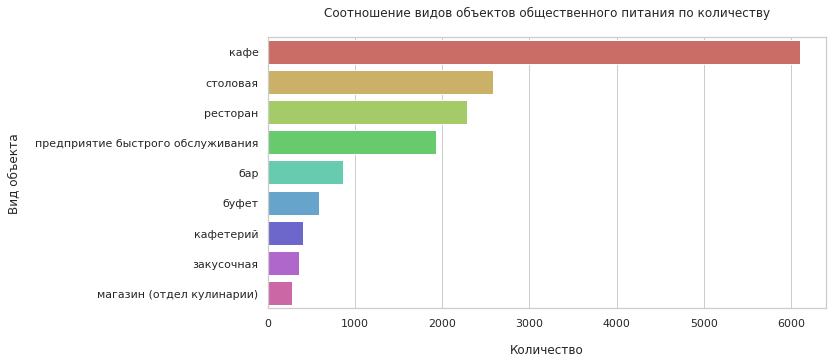

In [11]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = object_type_count,
            x = 'object_count', 
            y = 'object_type',
            palette = 'hls')

plt.title('Соотношение видов объектов общественного питания по количеству', pad=20)
plt.xlabel('Количество', labelpad = 15)
plt.ylabel('Вид объекта', labelpad = 15)
plt.show();

Дополнительно посмотрим на распределение доли заведений с помощью круговой диаграммы:

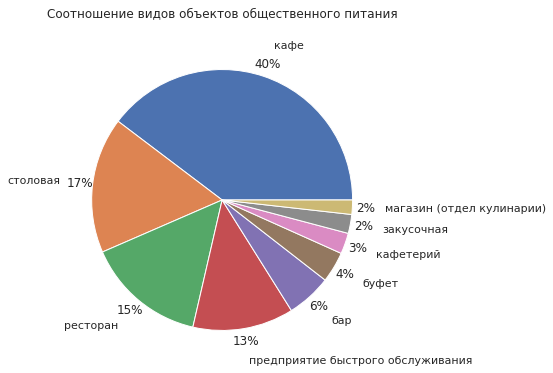

In [12]:
f, ax = plt.subplots(figsize = (6, 6))

plt.pie(object_type_count['object_count'],
       labels = object_type_count['object_type'],
       autopct = "%0.f%%",
       pctdistance=1.1,
       labeldistance=1.25)

plt.title('Соотношение видов объектов общественного питания', pad=20)
plt.show();

***Выводы***

Кафе - абсолютный лидер по типу объекта общественного питания в Москве.

В три раза меньше в городе столовых, ресторанов и предприятий быстрого обслуживания.

Совсем мало закусочных и отделов кулинарии в магазинах.

<a name="chainratio"></a>

**2. Исследуем соотношение сетевых и несетевых заведений по количеству**

Посчитаем количество каждого вида объекта общественного питания:

In [13]:
chain_type_count = rest_data['chain'].value_counts().reset_index()
chain_type_count.columns = ['chain', 'count']

chain_type_count

,chain,count
0,нет,12398
1,да,2968


Визуализируем полученный результат в виде графика:

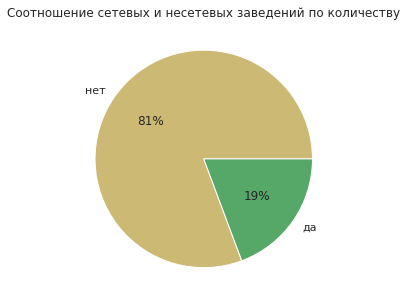

In [14]:
f, ax = plt.subplots(figsize = (5, 5))

plt.pie(chain_type_count['count'],
       labels = chain_type_count['chain'],
       colors = ['y','g'],
       autopct = "%0.f%%",)

plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.show();

***Выводы***

Несетевых заведений в Москве гораздо больше (в 4 раза).

<a name="objecttypechain"></a>

**3. Определим, для какого вида объекта общественного питания характерно сетевое распространение**

Посчитаем, сколько сетевых и несетвых объектов у каждого вида объекта общественного питания:

In [15]:
object_type_chain = rest_data.pivot_table(index = 'object_type',
                                         columns = 'chain',
                                         values = 'id',
                                         aggfunc = 'count').reset_index()

# вывод отсортируем по убыванию количества сетевых объектов

object_type_chain.sort_values('да', ascending=False)

chain,object_type,да,нет
3,кафе,1396,4703
6,предприятие быстрого обслуживания,791,1132
7,ресторан,544,1741
5,магазин (отдел кулинарии),78,195
2,закусочная,56,304
4,кафетерий,52,346
0,бар,37,819
1,буфет,11,574
8,столовая,3,2584


Отобразим полученные результаты на графиках для наглядности:

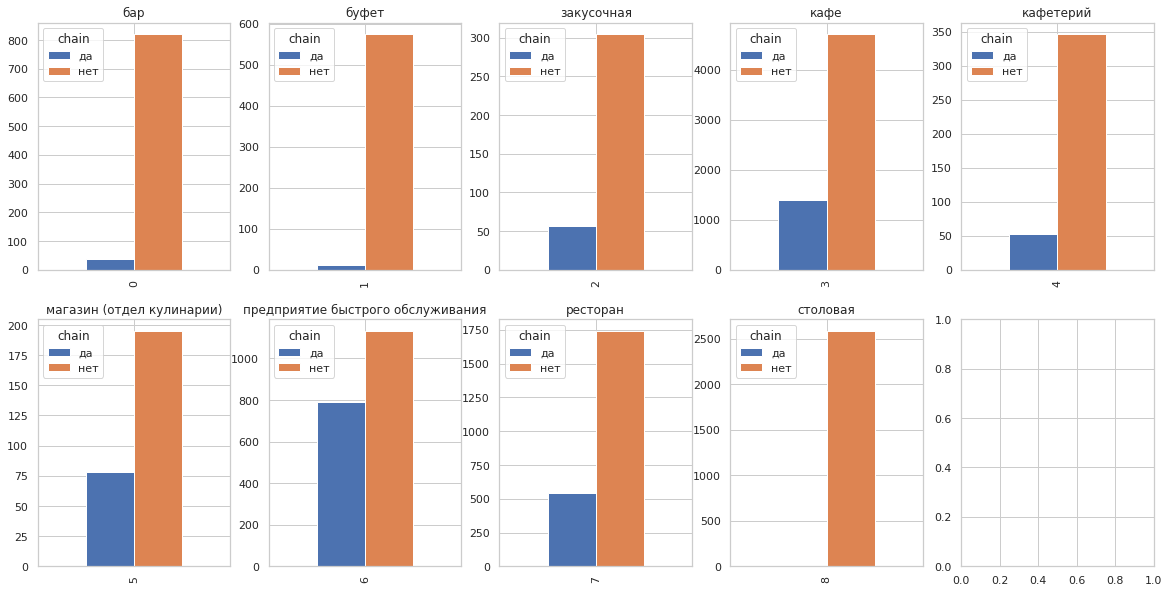

In [16]:
object_types = object_type_chain['object_type'].unique()
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(20, 10))

for object_type, ax in zip(object_types, axes.flat):
    object_type_chain[object_type_chain['object_type'] == object_type].plot.bar(title=object_type, ax = ax)
    
plt.show();

Видим, что несетевых заведений в каждом виде объекта общественного питания гораздо больше, чем сетевых.

Отобразим на одном графике только все сетевые объекты, чтобы понять, для какого вида заведения более характерно сетевое распространение в сравнении с другими:

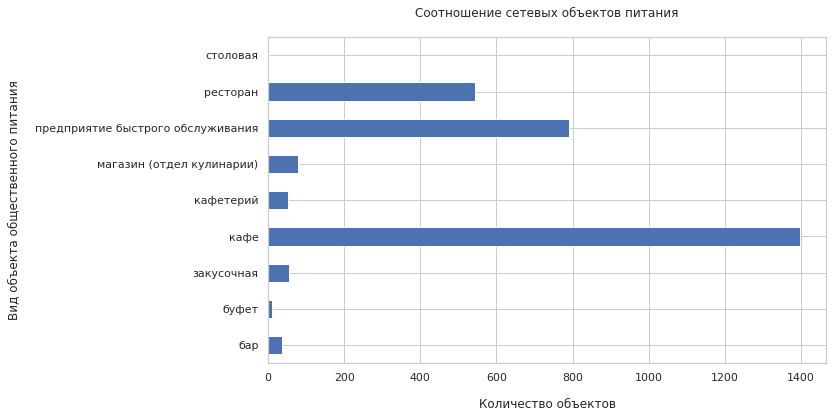

In [17]:
object_type_chain_fig = rest_data[rest_data['chain'] == 'да'].pivot_table(index = 'object_type', 
                      columns = 'chain',
                      values = 'id',
                      aggfunc = 'count').plot(kind="barh", 
                                              figsize=(10, 6),                                               
                                              grid=True,
                                              legend=False)

object_type_chain_fig.set_title('Соотношение сетевых объектов питания', pad = 20)
object_type_chain_fig.set_xlabel('Количество объектов', labelpad = 15)
object_type_chain_fig.set_ylabel('Вид объекта общественного питания', labelpad = 15)

plt.show()

***Выводы***

Ни один из объектов не является преимущественно сетевым. В каждом виде объекта питания количество несетевых заведений гораздо больше.

Если сравнивать только сетевые объекты между собой, то в тройку по количеству входят: кафе, предприятия быстрого обслуживания и рестораны. В остальных объектах питания сетевых точек гораздо меньше.

<a name="chainseatscount"></a>

**4. Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест**

Выделим в список три вида объекта, для которых более характерно сетевое распротранение по сравнению с другими (их мы нашли на предыдущем шаге):

In [18]:
object_types = ['кафе', 'ресторан', 'предприятие быстрого обслуживания']

Сформируем датасет только с сетевыми объектами питания:

In [19]:
rest_data_chain = rest_data.query('chain == "да"')

Построим гистограммы распределения количества посадочных мест в сетевых объектах питания:

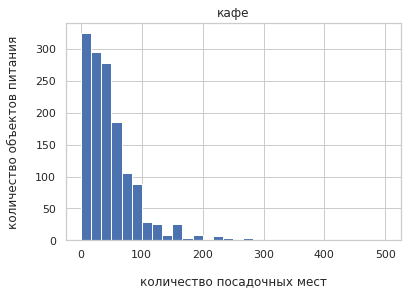

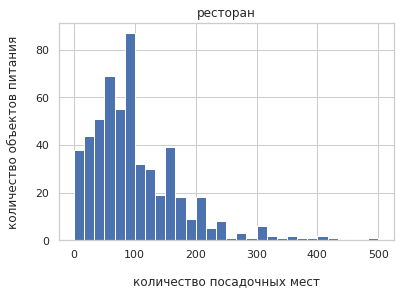

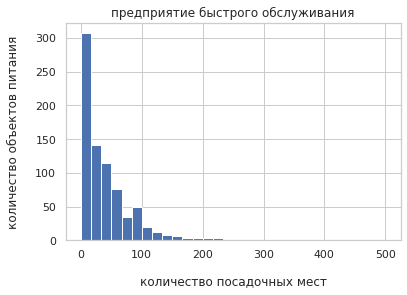

In [20]:
for object_type in object_types:
    rest_data_chain[rest_data_chain['object_type'] == object_type]['seats_count'].hist(range=(0, 500), bins=30)
    plt.title(object_type)
    plt.xlabel('количество посадочных мест', labelpad = 15)
    plt.ylabel('количество объектов питания', labelpad = 15)
    plt.show();

Дополнительно посмотрим на распределение количества посадочных мест с помощью boxplot. 

Ограничим вывод данных, отрезав заведения с количеством посадочных мест больше 230, чтобы выбросы не мешали смотреть на график (возьмём ограничение в 230, исходя из графиков выше - основные значения распределены до этой отметки):

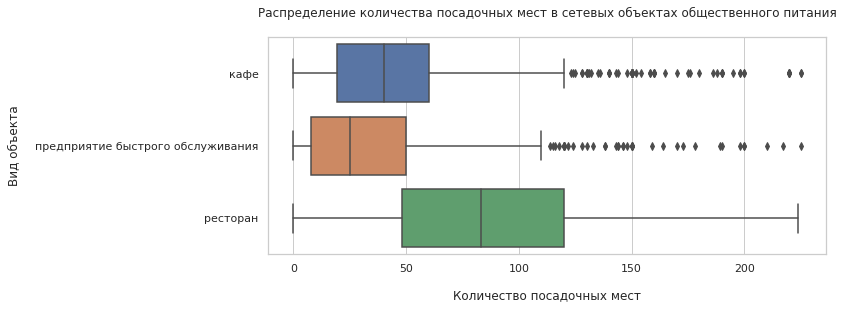

In [21]:
plt.figure(figsize=(10,4))

sns.boxplot(x='seats_count', y='object_type', 
           data=rest_data_chain.query('object_type in @object_types and seats_count < 230'))

plt.title('Распределение количества посадочных мест в сетевых объектах общественного питания', pad=20)
plt.xlabel('Количество посадочных мест', labelpad = 15)
plt.ylabel('Вид объекта', labelpad = 15);

***Выводы***

Видим, что для кафе и предприятий быстрого обслуживания характерно иметь количество посадочных мест до 50. Таких объектов большинство.

Среди ресторанов же, напротив, более распространены объекты с количеством посадочных мест от 50 до 125.

<a name="objecttypeseatscount"></a>

**5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест** 

Определим, какой вид объекта общественного питания предоставляет в среднем самое большое количество посадочных мест.

Посчитаем среднее количество посадочных мест для каждого вида объекта общественного питания. 

С учётом того, что на предыдущем шаге мы увидели выбросы в данных, возьмём в качестве меры усреднения данных медиану:

In [22]:
object_type_seats_count = (rest_data.groupby('object_type')['seats_count'].median()
                           .round().astype('int')
                           .sort_values(ascending = False)
                           .reset_index())
object_type_seats_count.columns = ['object_type', 'seats_count']

object_type_seats_count

,object_type,seats_count
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,кафетерий,6
6,предприятие быстрого обслуживания,5
7,магазин (отдел кулинарии),0
8,закусочная,0


Визуализируем полученный результат в виде графика:

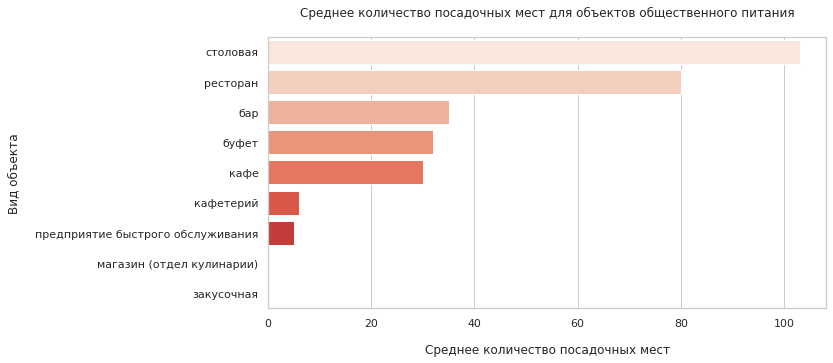

In [23]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = object_type_seats_count,
            x = 'seats_count', 
            y = 'object_type',
            palette = 'Reds')

plt.title('Среднее количество посадочных мест для объектов общественного питания', pad=20)
plt.xlabel('Среднее количество посадочных мест', labelpad = 15)
plt.ylabel('Вид объекта', labelpad = 15)
plt.show();

***Выводы***

В среднем самое большое количество посадочных мест в столовых и ресторанах: 80-100.

<a name="streetfromaddress"></a>

**6. Выделим отдельно информацию об улице из данных адресов**

В нашем датасете в большинстве адресов улицы являются вторым элементом в "адресе" (первый - город Москва), но есть адреса, для которых нет указания города в первом элементе - для них за улицу возьмём как раз первый элемент.

Найти такие адреса и правильно присвоить им "улицу" поможет функция:

In [24]:
def get_street(address):
    address_list = address.split(",")
    if "город" not in address_list[0]:
        street = address_list[0]
    else: 
        street = address_list[1].strip()
    return street

rest_data['street'] = rest_data['address'].apply(get_street)

# проверяем
rest_data['street']

0        улица Егора Абакумова 
1        улица Талалихина      
2        Абельмановская улица  
3        Абрамцевская улица    
4        Абрамцевская улица    
                ...            
15361    3-й Крутицкий переулок
15362    улица Земляной Вал    
15363    улица Земляной Вал    
15364    поселение Московский  
15365    Ходынский бульвар     
Name: street, Length: 15366, dtype: object

<a name="topstreets"></a>

**7. Построим график топ-10 улиц по количеству объектов общественного питания и определим, в каких районах Москвы находятся эти улицы**

Создадим таблицу с 10-ю самыми заполненными заведениями общественного питания улицами:

In [25]:
top_10_street = (rest_data.groupby('street')['id'].count()
                 .sort_values(ascending=False)
                 .reset_index()
                 .head(10))
top_10_street.columns = ['street', 'count']

top_10_street

,street,count
0,город Зеленоград,232
1,проспект Мира,204
2,Профсоюзная улица,183
3,Ленинградский проспект,173
4,Пресненская набережная,167
5,Варшавское шоссе,162
6,Ленинский проспект,148
7,поселение Сосенское,139
8,проспект Вернадского,132
9,Кутузовский проспект,114


Отобразим в виде графика:

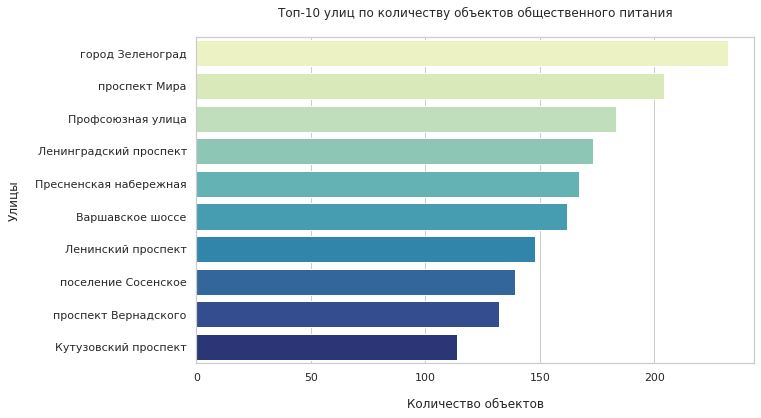

In [26]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 6))

sns.barplot(data = top_10_street,
            x = 'count', 
            y = 'street',
            palette = 'YlGnBu')

plt.title('Топ-10 улиц по количеству объектов общественного питания', pad=20)
plt.xlabel('Количество объектов', labelpad = 15)
plt.ylabel('Улицы', labelpad = 15)
plt.show();

***Выводы***

Зеленоград победил :)

В Москве самые насыщенные улицы: проспект Мира, Профсоюзная, Ленинградский проспект, Пресненская набережная и Варшавское шоссе. На них расположено от 150 до 200 объектов общественного питания.

Последними в топ-10 оказались поселение Сосенское, проспект Вернадского и Кутузовский проспект. На них расположилось в среднем от 120 до 140 объектов питания.

In [28]:
# сохраним названия улиц в отдельный список

top_10_street_list = top_10_street['street'].to_list()

Загружаем файл с данными адресного реестра объектов недвижимости города Москвы (с сайта [data.mos.ru](https://data.mos.ru/opendata/7705031674-adresniy-reestr-zdaniy-i-soorujeniy-v-gorode-moskve) ):

In [29]:
district_data = pd.read_excel('data-29580-2020-08-27.xlsx') 

In [30]:
# проверяем

district_data.head()

,OBJ_TYPE,OnTerritoryOfMoscow,ADDRESS,UNOM,P1,P3,P4,P5,P6,P7,...,KLADR,TDOC,NDOC,DDOC,ADR_TYPE,VID,SOSTAD,STATUS,global_id,geoData
0,Здание,да,"город Москва, Варшавское шоссе, дом 150, строение 2",3802928,город Москва,NaN,NaN,муниципальный округ Чертаново Южное,NaN,Варшавское шоссе,...,77000000000047600,Распоряжение префектуры АО города Москвы,01-41-2050,19.08.2004,Официальный,Адрес,Зарегистрирован в АР,Внесён в ГКН,645622140,"{ ""coordinates"" : [ [ [ 37.6013796035561 , 55.5991142140071] , [ 37.6011052822832 , 55.5991548952736] , [ 37.6010327636358 , 55.5991656534652] , [..."
1,Здание,да,"город Москва, Косинская улица, дом 26А",2102436,город Москва,NaN,NaN,муниципальный округ Вешняки,NaN,Косинская улица,...,77000000000040000,Распоряжение префектуры АО города Москвы,875-В-РП,28.07.2004,Официальный,Адрес,Зарегистрирован в АР,Внесён в ГКН,645622141,"{ ""coordinates"" : [ [ [ 37.8279504545784 , 55.7176609928454] , [ 37.8286195050135 , 55.7174401927724] , [ 37.8284661997432 , 55.7172920310098] , [..."
2,Здание,да,"город Москва, Гороховский переулок, дом 21",5783,город Москва,NaN,NaN,муниципальный округ Басманный,NaN,Гороховский переулок,...,77000000000112200,Распоряжение префектуры АО города Москвы,3026-р,04.07.2005,Официальный,Адрес,Зарегистрирован в АР,Внесён в ГКН,645622142,"{ ""coordinates"" : [ [ [ 37.6682995208392 , 55.7662431483298] , [ 37.6683153361192 , 55.7662161815465] , [ 37.6682467711738 , 55.7662023546956] , [..."
3,Здание,да,"город Москва, Тагильская улица, дом 4, строение 36",2404968,город Москва,NaN,NaN,муниципальный округ Метрогородок,NaN,Тагильская улица,...,77000000000346200,Распоряжение префектуры АО города Москвы,190-В-РП,22.02.2008,Официальный,Адрес,Зарегистрирован в АР,Внесён в ГКН,645622163,"{ ""coordinates"" : [ [ [ 37.7527975561661 , 55.8182433594588] , [ 37.7529320804668 , 55.8183239177059] , [ 37.7530211001649 , 55.8182752336922] , [..."
4,Здание,да,"город Москва, Ленинградский проспект, дом 73А, строение 3",2133081,город Москва,NaN,NaN,муниципальный округ Сокол,NaN,Ленинградский проспект,...,77000000000168500,Распоряжение префектуры АО города Москвы,9169,31.10.2003,Официальный,Адрес,Зарегистрирован в АР,Внесён в ГКН,645622174,"{ ""coordinates"" : [ [ [ 37.5136462392231 , 55.8036296358468] , [ 37.5136841925791 , 55.8035711719249] , [ 37.5137585785489 , 55.8034568138617] , [..."


Выделим из полученной таблицы два интересующих нас столбца: полный адрес и соответствующий ему округ, сохраним в отдельную таблицу:

In [31]:
district = district_data[['ADDRESS', 'ADM_AREA']]

In [32]:
# переименуем столбцы

district = district.rename(columns={'ADDRESS': 'address', 'ADM_AREA': 'district'})

district.head()

,address,district
0,"город Москва, Варшавское шоссе, дом 150, строение 2",Южный административный округ
1,"город Москва, Косинская улица, дом 26А",Восточный административный округ
2,"город Москва, Гороховский переулок, дом 21",Центральный административный округ
3,"город Москва, Тагильская улица, дом 4, строение 36",Восточный административный округ
4,"город Москва, Ленинградский проспект, дом 73А, строение 3",Северный административный округ


Объединим полученную таблицу с округами с нашей таблицей с данными по столбцу address:

In [33]:
district_join = rest_data.merge(district, on='address', how='left')
                                
# проверяем

district_join.head()            

,id,object_name,chain,object_type,address,seats_count,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Северо-Восточный административный округ
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Центральный административный округ
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Центральный административный округ
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Северо-Восточный административный округ
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Северо-Восточный административный округ


Добавим к самым насыщенным заведениями улицам группировку по районам.

Предварительно сделаем срез из датасета, оставив только интересующие нас улицы:

In [34]:
district_street = (district_join.query('street in @top_10_street_list')
                   .groupby(['street', 'district'])['id'].count()
                   .reset_index())
district_street.columns = ['street', 'district', 'count']

# вывод отсортируем по улицам

district_street.sort_values(by=['street'], ascending=False)

,street,district,count
14,проспект Мира,Северо-Восточный административный округ,141
15,проспект Мира,Центральный административный округ,63
12,проспект Вернадского,Западный административный округ,117
13,проспект Вернадского,Юго-Западный административный округ,15
11,поселение Сосенское,Новомосковский административный округ,138
10,город Зеленоград,Зеленоградский административный округ,219
9,Профсоюзная улица,Юго-Западный административный округ,182
8,Пресненская набережная,Центральный административный округ,167
4,Ленинский проспект,Западный административный округ,22
5,Ленинский проспект,Центральный административный округ,25


In [46]:
district_street.query('street in ("проспект Мира", "Профсоюзная улица")')

,street,district,count
9,Профсоюзная улица,Юго-Западный административный округ,182
14,проспект Мира,Северо-Восточный административный округ,141
15,проспект Мира,Центральный административный округ,63


Видим, что некоторые улицы тянутся сразу через несколько округов. Оставим только округа-"лидеры" по количеству заведений на улице:

In [35]:
district_lead = (district_street.groupby('street')['district', 'count'].max()
                 .sort_values(by='count', ascending=False)
                 .reset_index())
district_lead.columns = ['street', 'district', 'count']

district_lead

,street,district,count
0,город Зеленоград,Зеленоградский административный округ,219
1,Профсоюзная улица,Юго-Западный административный округ,182
2,Ленинградский проспект,Северный административный округ,171
3,Пресненская набережная,Центральный административный округ,167
4,Варшавское шоссе,Южный административный округ,156
5,проспект Мира,Центральный административный округ,141
6,поселение Сосенское,Новомосковский административный округ,138
7,проспект Вернадского,Юго-Западный административный округ,117
8,Кутузовский проспект,Западный административный округ,114
9,Ленинский проспект,Южный административный округ,88


Построим график:

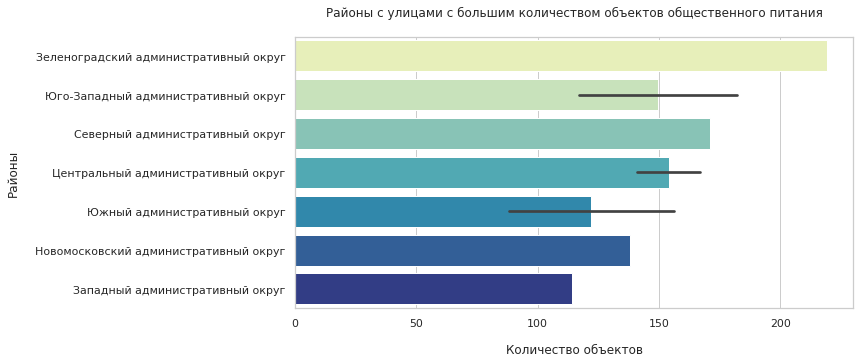

In [36]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 5))

sns.barplot(data = district_lead,
            x = 'count', 
            y = 'district',
            palette = 'YlGnBu')
plt.title('Районы с улицами с большим количеством объектов общественного питания', pad=20)
plt.xlabel('Количество объектов', labelpad = 15)
plt.ylabel('Районы', labelpad = 15)
plt.show();

***Выводы***

Зеленоградский округ явно лидирует. 

Если смотреть на территорию внутри МКАДа, то больше всего объектов питания в Юго-Западном, Северном и Центральном округах.

Меньше всего улиц из топ-10 с объектами питания в Западном округе.

<a name="onetypestreetscount"></a>

**8. Найдём число улиц с одним объектом общественного питания и определим, в каких районах Москвы находятся эти улицы**

Посчитаем, сколько объектов питания расположено на каждой улице:

In [37]:
rest_street = (rest_data.groupby('street')['id'].count()
               .sort_values()
               .reset_index())
rest_street.columns = ['street', 'count']

# проверяем

rest_street.head()

,street,count
0,Парусный проезд,1
1,Бутиковский переулок,1
2,улица Васильцовский Стан,1
3,Вагоноремонтная улица,1
4,Союзный проспект,1


Оставим только улицы с одним заведением общественного питания, сохраним в отдельную таблицу:

In [38]:
one_rest_street = rest_street.query('count == 1')

print('Число улиц с одним объектом питания:', len(one_rest_street))
print()
display(one_rest_street)

Число улиц с одним объектом питания: 543



,street,count
0,Парусный проезд,1
1,Бутиковский переулок,1
2,улица Васильцовский Стан,1
3,Вагоноремонтная улица,1
4,Союзный проспект,1
...,...,...
538,42-й километр Московской Кольцевой Автодороги,1
539,42-й километр Калужского шоссе,1
540,Нижний Таганский тупик,1
541,5-й Монетчиковский переулок,1


Сохраним названия улиц в отдельный список:

In [39]:
one_rest_street_list = one_rest_street['street'].to_list()

Сформируем таблицу с найденными улицами и соответствующими им округами:

In [40]:
street_district_one = district_join.query('street in @one_rest_street_list')[['street', 'district']]

# проверяем

street_district_one

,street,district
19,Филипповский переулок,Центральный административный округ
61,Бабаевская улица,Восточный административный округ
69,1-й Балтийский переулок,Северный административный округ
81,улица Демьяна Бедного,Северо-Западный административный округ
131,Будайская улица,Северо-Восточный административный округ
...,...,...
14139,1-й Силикатный проезд,Северо-Западный административный округ
14253,3-й Угрешский проезд,Юго-Восточный административный округ
14466,улица Линии Октябрьской Железной Дороги,Северный административный округ
14488,80-й километр Московской Кольцевой Автодороги,Северный административный округ


Посчитаем количество заведений "одиночек" на улицах в каждом округе:

In [41]:
district_for_one = (street_district_one.groupby('district')['street'].count()
                    .sort_values(ascending=False)
                    .reset_index())
district_for_one.columns = ['district', 'count']

district_for_one

,district,count
0,Центральный административный округ,167
1,Северо-Восточный административный округ,64
2,Восточный административный округ,64
3,Юго-Восточный административный округ,54
4,Северный административный округ,53
5,Западный административный округ,43
6,Южный административный округ,32
7,Северо-Западный административный округ,29
8,Юго-Западный административный округ,26
9,Новомосковский административный округ,1


Изобразим наглядно:

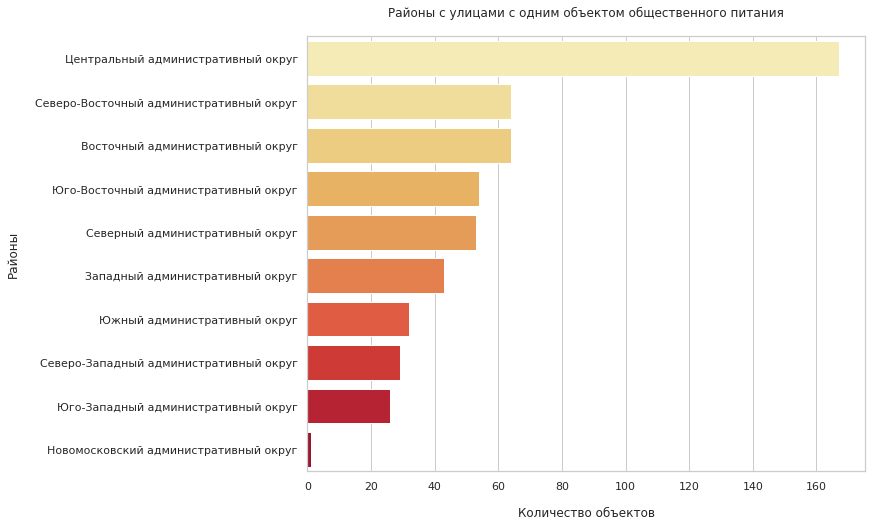

In [42]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize = (10, 8))

sns.barplot(data = district_for_one,
            x = 'count', 
            y = 'district',
            palette = 'YlOrRd')

plt.title('Районы с улицами с одним объектом общественного питания', pad=20)
plt.xlabel('Количество объектов', labelpad = 15)
plt.ylabel('Районы', labelpad = 15)
plt.show();

***Выводы***

В Москве всего 543 улицы с одним заведением общественного питания.

Центральный округ явно переполнен улицами с одним объектом питания. В нём почти 170 заведений.

В Новомосковском округе всего 1 объект питания.

В остальных округах в среднем от 30 до 60 улиц с 1 объектом общественного питания.

<a name="manytypesseatscount"></a>

**9. Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявим закономерности**

Сформируем датасет только с интересующими нас улицами с большим количество объектов питания (их список мы сформировали ранее):

In [43]:
rest_data_seats_count = district_join.query('street in @top_10_street_list')

Построим гистограммы распределения количества посадочных мест для всего датасета:

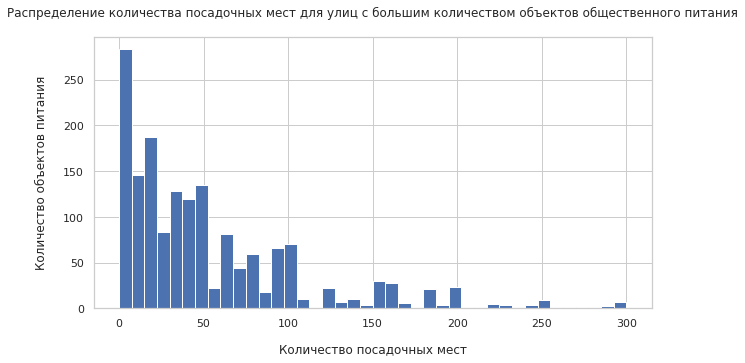

In [44]:
plt.figure(figsize=(10,5))

rest_data_seats_count['seats_count'].hist(range=(0, 300), bins=40)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания', pad=20)
plt.xlabel('Количество посадочных мест', labelpad = 15)
plt.ylabel('Количество объектов питания', labelpad = 15)
plt.show();

Для насыщенных объектами общественного питания улиц характерно малое количество посадочных мест в заведениях - до 50.

Посмотрим подробнее на распределение с помощью графика boxplot, при чём отдельно на каждую улицу. 

Дополнительно ограничим вывод, отрезав количество посадочных мест больше 200, чтобы выбросы не мешали смотреть на график:

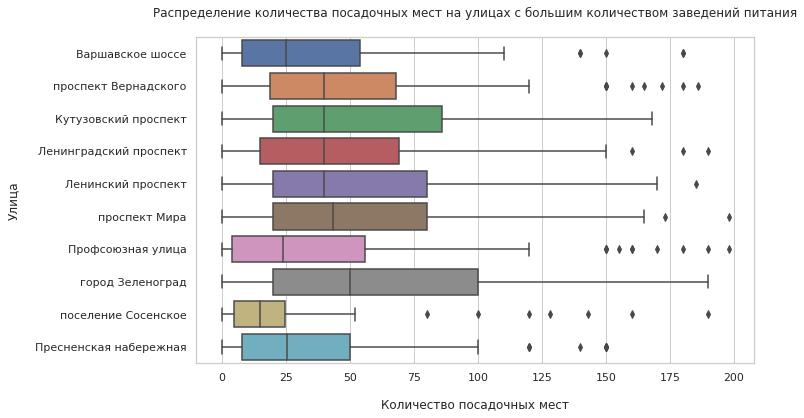

In [45]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='seats_count', y='street', 
           data=rest_data_seats_count.query('seats_count < 200'))

plt.title('Распределение количества посадочных мест на улицах с большим количеством заведений питания', pad=20)
plt.xlabel('Количество посадочных мест', labelpad = 15)
plt.ylabel('Улица', labelpad = 15);

***Выводы***

В поселении Сосенское абсолютное большинство заведений ограничиваются не более 25 посадочными местами.

На Профсоюзной улице, Пресненской набережной и Варшавском шоссе в заведениях принято иметь в среднем не более 50 посадочных мест. Причём половине хватает и 25 мест.

На остальных улицах в топ-10, за исключением Зеленограда, половина заведений обзавелась 30-40 посадочными местами, другой половине достаточно в среднем не более 80 мест.

В Зеленограде ситуация отличается: здесь 50 мест - как минимум у половины заведений, а верхняя планка в районе 100 посадочных мест.

<a name="conclusion"></a>

## Шаг 3. Общий вывод

В этом блоке **рекомендации для инвесторов**. В блоке ниже общие выводы по всем рассмотренным параметрам.

В Москве гораздо больше (в 4 раза) несетевых заведений, но развитие сети характерно как раз для кафе. С перспективой на будущее стоит выбрать именно этот вид заведения.

Количество посадочных мест в заведениях общественного питания в среднем по городу находится на отметке 50 мест. В насыщенных заведениями районах ограничиваются даже 25 посадочными местами. 

С учётом специфики кафе, можно рассчитывать на 20-30 посадочных мест - такое количество смогут обслужить пара роботов. Соответственно, чем больше роботов-официантов мы "наймём" на работу, тем больше посадочных мест сможем обслужить.
Также стоит учесть, что обычно заряда хватает роботу на 4-5 часов, т.е. для 12-тичасового рабочего дня нам будет необходим третий робот, который сможет заменять разрядившегося товарища и подключаться к обслуживанию клиентов в часы-пик.

Западный округ кажется самым привлекательным для размещения кафе. Он не перенасыщен заведениями питания, причём они распределены по округу и не концентрируются на одной улице, за исключением Кутузовского проспекта. При этом он находится на территории самой Москвы, что гарантирует поток посетителей.

### Выводы


***Cоотношение видов объектов общественного питания, а также сетевых и несетевых заведений.***

1. Кафе - абсолютный лидер по типу объекта общественного питания в Москве.

В три раза меньше в городе столовых, ресторанов и предприятий быстрого обслуживания.
Совсем мало закусочных и отделов кулинарии в магазинах.


2. Несетевых заведений в Москве в 4 раза больше, чем сетевых.


3. Сетевое распространение более характерно для кафе, предприятий быстрого обслуживания и ресторанов. В остальных объектах питания сетевых точек гораздо меньше.

Но при этом ни один из объектов общественного питания не является преимущественно сетевым. В каждом виде заведений питания количество несетевых объектов гораздо больше.


***Распределение посадочных мест***

1. Среди сетевых кафе и предприятий быстрого обслуживания много заведений с небольшим числом посадочных мест (до 50).

Среди ресторанов же, напротив, более распространены объекты с количеством посадочных мест от 50 до 125.


2. В среднем самое большое количество посадочных мест в столовых и ресторанах: 80-100.


3. Для насыщенных объектами общественного питания улиц характерно малое количество посадочных мест в заведениях - до 50.

В поселении Сосенское абсолютное большинство заведений ограничиваются не более 25 посадочными местами.

На Профсоюзной улице, Пресненской набережной и Варшавском шоссе в заведениях принято иметь в среднем не более 50 посадочных мест. Причём половине хватает и 25 мест.

На остальных улицах в топ-10, за исключением Зеленограда, половина заведений обзавелась 30-40 посадочными местами, другой половине достаточно в среднем не более 80 мест.

В Зеленограде ситуация отличается: здесь 50 мест - как минимум у половины заведений, а верхняя планка в районе 100 посадочных мест.


***Распределение заведений общественного питания по улицам и районам Москвы***

1. Зеленоградский округ лидирует по общему количеству объектов общественного питания. 

Если смотреть на территорию внутри МКАДа, то больше всего объектов питания в Юго-Западном, Северном и Центральном округах.
Самые насыщенные улицы: проспект Мира, Профсоюзная, Ленинградский проспект, Пресненская набережная и Варшавское шоссе. На них расположено от 150 до 200 объектов общественного питания.

Меньше всего улиц из топ-10 с объектами питания в Западном округе.
Последними в топ-10 оказались поселение Сосенское, проспект Вернадского и Кутузовский проспект. На них расположилось в среднем от 120 до 140 объектов питания.


2. В Москве 543 улицы с одним заведением общественного питания.

    - Центральный округ явно переполнен улицами с одним объектом питания. В нём почти 170 заведений.
    - В Новомосковском округе всего 1 объект питания.
    - В остальных округах в среднем от 30 до 60 улиц с 1 объектом общественного питания.